In [1]:
# Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

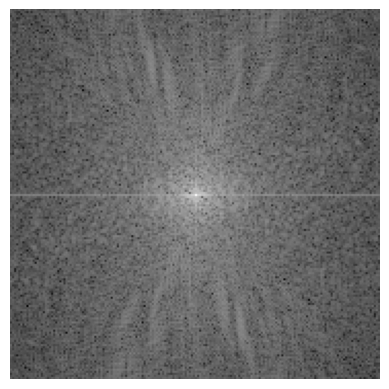

In [2]:
# open the image
f = cv2.imread('cat.jpg',0)

# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

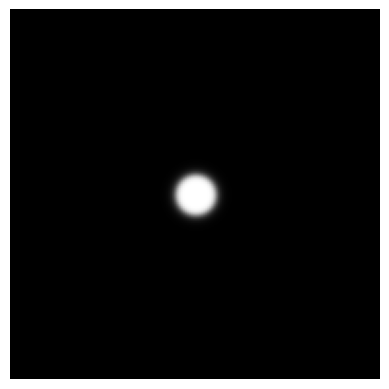

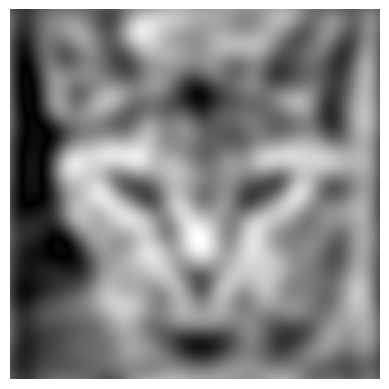

In [3]:
# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10 # cut of frequency
n = 10 # order 
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

C:\Users\Joo Kai\AppData\Local\Temp\ipykernel_1728\2800280868.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  HPF[u,v] = 1 / (1 + (D0/D)**n)


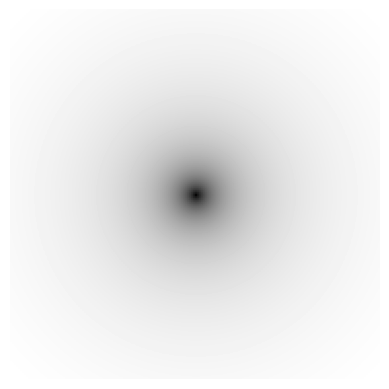

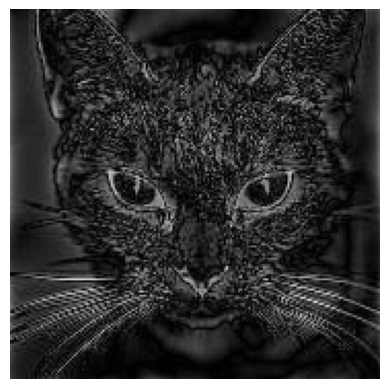

In [4]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)
        
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()